# Rencontre R -  un Petit réseau de neurone

Il y a une dizaine d'années, la ville de Madrid a décidé de collecter et de partager des données sur la qualité de l'air. Nous allons travailler sur les données de 2007 à 2009, afin de tenter de prédire la quantité de CO2 à partir des autres variables.

## 1 - Charger le jeu de données

In [17]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px


In [ ]:
df_madrid = pd.read_csv('madrid/full_data.csv', parse_dates=['date'])
df_madrid.dropna(inplace=True)
df_madrid.set_index('date', inplace=True)
df_madrid.sort_index(inplace=True)
df_madrid.head()

In [11]:
df_madrid.describe()
df_madrid = df_madrid.drop(columns= ["station"])

In [ ]:
df_madrid.plot( label='ground truth')

In [13]:
sns.set_theme()
sns.set(rc={'figure.figsize':(11, 8)})

In [ ]:
df_madrid.plot( label='ground truth')

In [ ]:
fig = px.line(df_madrid)
fig.show()

In [ ]:
fig = px.area(df_madrid)
fig.show()

## 2 - Récupérer 2007 et 2008 comme données d'apprentissage

Nous avons la chance de disposer de données temporelles sur 3 ans. Nous pouvons donc nous baser sur les données de 2007 et 2008 pour apprendre à réaliser une prédiction correcte.

In [20]:
df_train = df_madrid.loc['2007-01-01':'2008-12-31']
x_train = df_train.drop(columns='CO').values
y_train = df_train.CO.values

print(x_train.shape)
print(y_train.shape)

(51071, 14)
(51071,)


## 3 - Récupérer les données de 2009 comme données d'évaluation

 Nous évaluerons ensuite l'algorithme sur les données de 2009.

In [21]:
df_eval =  df_madrid.loc['2009-01-01':]
x_eval = df_eval.drop(columns='CO').values
y_eval = df_eval.CO.values

print(x_eval.shape)
print(y_eval.shape)

(24720, 14)
(24720,)


## Créer le réseau de neurone

1. Créez un réseau de neurones en instanciant la classe [Sequential](https://keras.io/api/models/sequential/)
2. Ajoutez une couche [Input](https://keras.io/api/layers/core_layers/input/)
3. Ajoutez une couche [Dense](https://keras.io/api/layers/core_layers/dense/) de 512 neurones, avec une activation de type **relu**
3. Ajoutez une couche [Dense](https://keras.io/api/layers/core_layers/dense/) de 128 neurones, avec une activation de type **relu**
3. Ajoutez une couche [Dense](https://keras.io/api/layers/core_layers/dense/) de 32 neurones, avec une activation de type **relu**
3. Ajoutez une couche [Dense](https://keras.io/api/layers/core_layers/dense/) de 1 neurones, sans activation, pour réaliser la prédiciton

**Aide**

Dimensioner correctement la couche Input :

```
shape = x_eval.shape[1]
```


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *



model = Sequential()
model.add(Input(x_eval.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.summary()



2023-06-22 10:36:22.133450: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               7680      
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 77,505
Trainable params: 77,505
Non-trainable params: 0
_________________________________________________________________


2023-06-22 10:36:23.751248: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


<button data-toggle="collapse" data-target="#sol1" class='btn btn-primary'>Solution</button>
<div id="sol1" class="collapse">

```python
model = Sequential()
model.add(Input(x_eval.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.summary()
```
</div>

## Compiler le réseau

Compilez le réseau :

1. en utilisant la fonction de coût "mean_average_error" (**mae**) ;
2. avec la fonction d'optimisation de votre choix.  

In [23]:
model.compile(optimizer='adam', loss='mse')

<button data-toggle="collapse" data-target="#sol2" class='btn btn-primary'>Solution</button>
<div id="sol2" class="collapse">

```python
model.compile(optimizer='adam', loss='mae')
```
    
</div>

## Entraîner le réseau

Entraînez le réseau (méthode **fit**) :

+ sur 30 époques ;
+ avec un lot de 100 données.

In [24]:
import tensorboard
import tensorflow as tf


tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/fit/Reg_madrid_2", histogram_freq=1)

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_eval, y_eval),
    epochs=30,
    batch_size=100,
    callbacks=[tensorboard_callback],
    )

Epoch 1/30
511/511 [==============================] - 4s 7ms/step - loss: 0.6914 - val_loss: 0.0419
Epoch 2/30
511/511 [==============================] - 3s 6ms/step - loss: 0.0702 - val_loss: 0.0848
Epoch 3/30
511/511 [==============================] - 3s 6ms/step - loss: 0.0882 - val_loss: 0.0258
Epoch 4/30
511/511 [==============================] - 3s 6ms/step - loss: 0.0279 - val_loss: 0.0506
Epoch 5/30
511/511 [==============================] - 3s 6ms/step - loss: 0.0544 - val_loss: 0.0264
Epoch 6/30
511/511 [==============================] - 3s 7ms/step - loss: 0.0336 - val_loss: 0.0288
Epoch 7/30
511/511 [==============================] - 3s 6ms/step - loss: 0.0215 - val_loss: 0.0283
Epoch 8/30
511/511 [==============================] - 3s 6ms/step - loss: 0.0223 - val_loss: 0.0231
Epoch 9/30
511/511 [==============================] - 3s 7ms/step - loss: 0.0251 - val_loss: 0.0224
Epoch 10/30
511/511 [==============================] - 3s 6ms/step - loss: 0.0191 - val_loss: 0.0246

In [8]:
# rm -rf ./logs/


<button data-toggle="collapse" data-target="#sol4" class='btn btn-primary'>Solution</button>
<div id="sol4" class="collapse">

```python
history = model.fit(x_train, y_train, validation_data=(x_eval, y_eval), epochs=30, batch_size=100)
```
    
</div>

## Observer le processus d'apprentissage

Nous allons maintenant tracer la courbe correspondant à la fonction de coût (sur les données d'apprentissage et sur les données de validation).

L'apprentissage vous semble-t-il s'être bien déroulé ?

In [29]:
import plotly.express as px


fig = px.line(
    y=[
        history.history["loss"],
        history.history["val_loss"]
    ]
)

fig.show()

In [30]:
df = pd.DataFrame(
    {
        "loss" : history.history["loss"],
        "val_loss" : history.history["val_loss"]
    }
)
display(df.head())
fig= px.line(
    df,
    y=["loss", "val_loss"]
)
fig.show()

loss  val_loss
0  1.459310  0.025804
1  0.037248  0.025604
2  0.078083  0.024589
3  0.025253  0.026240
4  0.025581  0.028020

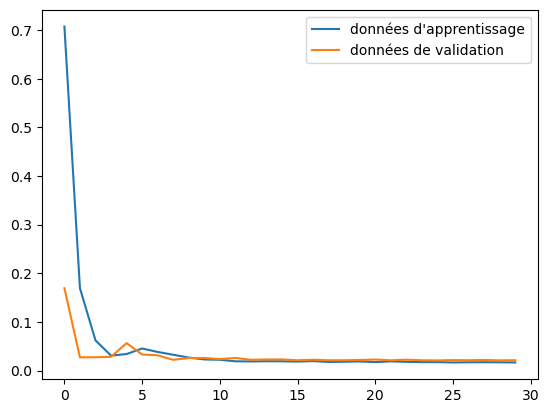

In [48]:
from matplotlib import pyplot as plt

plt.plot(history.history["loss"], label="données d'apprentissage")
plt.plot(history.history["val_loss"], label="données de validation")
plt.legend()
plt.show()

## Évaluation quantitative

Nous allons maintenant afficher la répartition statistique des erreurs commises. 

Interprétez ces résultats.

In [22]:
y_pred = model.predict(x_eval).flatten()

773/773 [==============================] - 2s 2ms/step


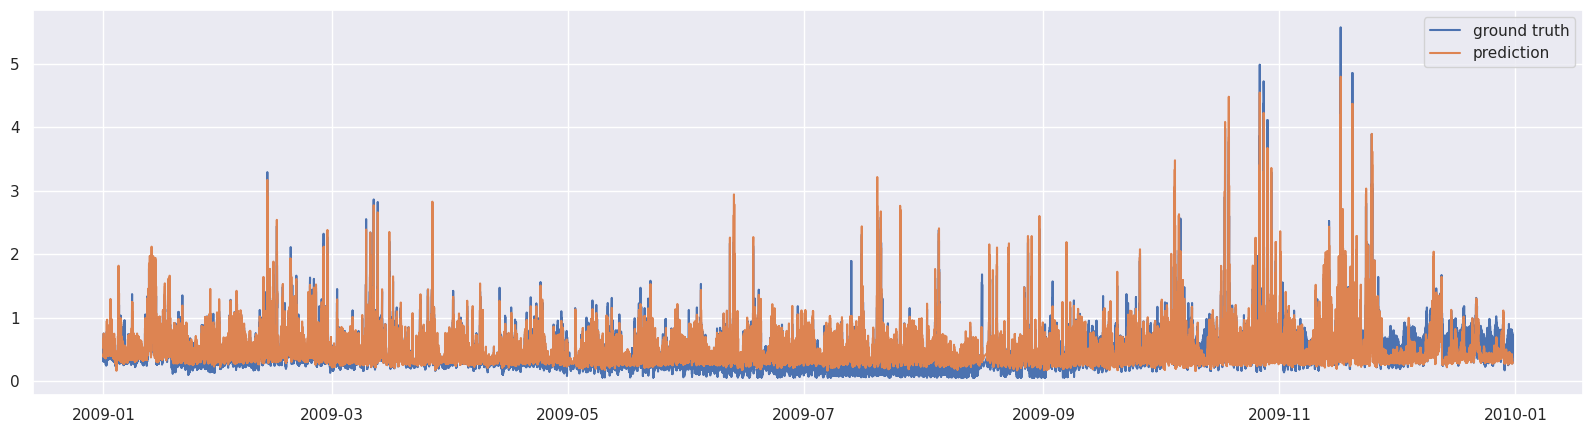

In [23]:
plt.figure(figsize=(20, 5))
plt.plot(df_eval.index, y_eval, label='ground truth')
plt.plot(df_eval.index, y_pred, label='prediction')
plt.legend()
plt.show()

In [28]:
fig = px.line(x = df_eval.index, y = [y_eval,y_pred])
fig.show()

In [31]:
import numpy as np
y_pred = model.predict(x_eval).flatten()
df_eval = pd.DataFrame(
    {
        "y_pred" : y_pred,
        "y_eval" : y_eval
    }
)

absolute_errors = np.abs(y_pred - y_eval)
df_eval["mae"] = absolute_errors

fig = px.box(df_eval, x="mae")
fig.show()

773/773 [==============================] - 2s 2ms/step


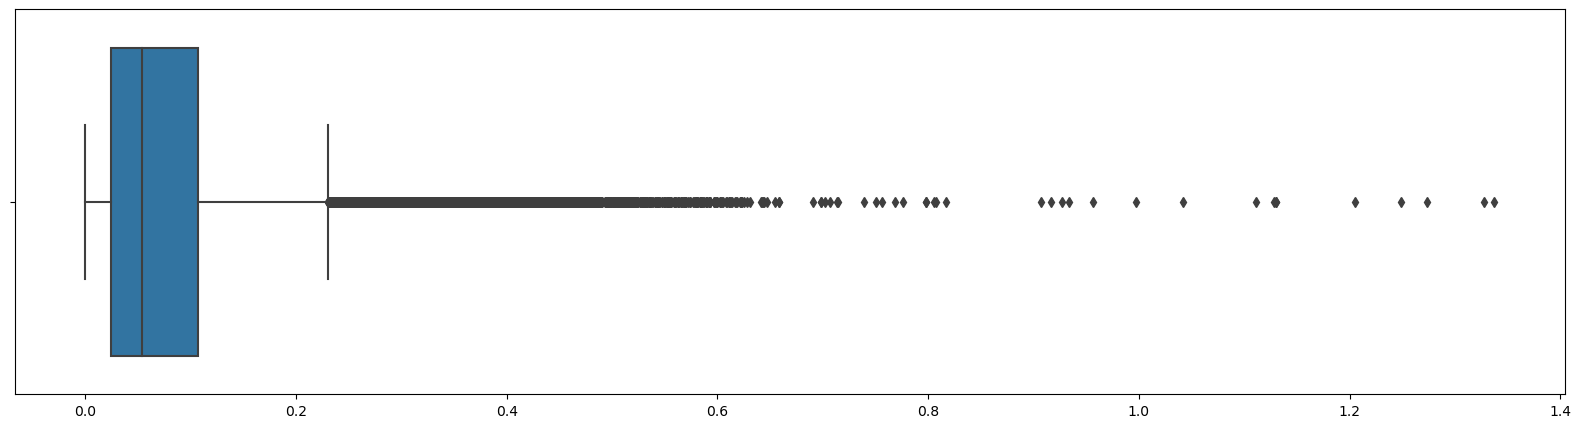

In [50]:
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

absolute_errors = np.abs(y_pred - y_eval)

plt.figure(figsize=(20, 5))
sns.boxplot(x = absolute_errors)
plt.show()

## Évaluation qualitative

Observons maintenant les prédictions réalisées par le réseau par rapport à la vérité terrain.

**Que constatez vous ?**

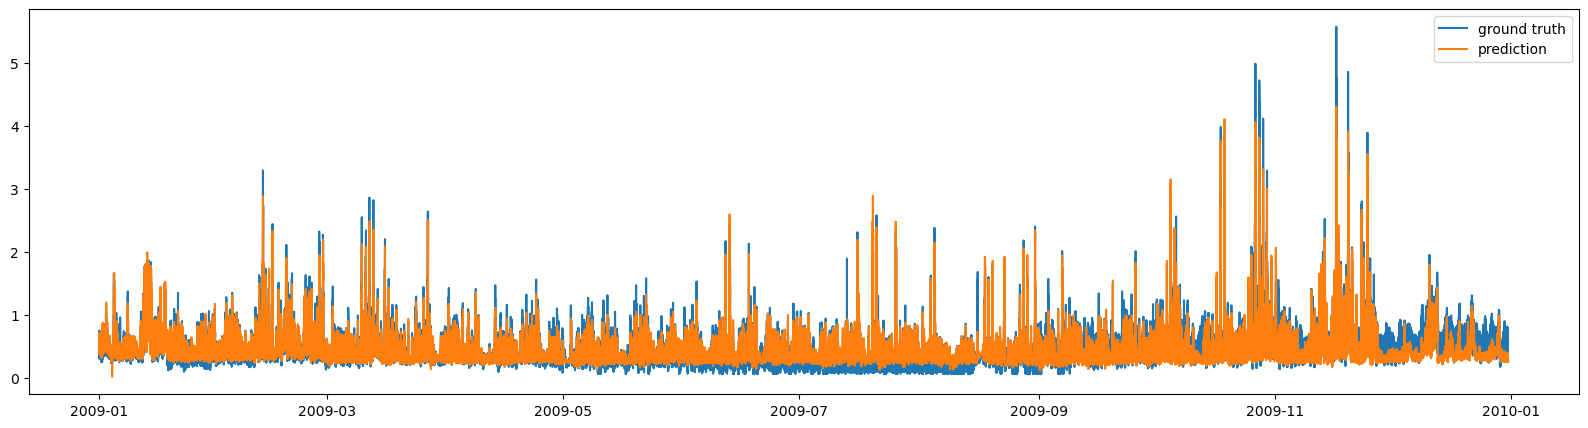

In [51]:
plt.figure(figsize=(20, 5))
plt.plot(df_eval.index, y_eval, label='ground truth')
plt.plot(df_eval.index, y_pred, label='prediction')
plt.legend()
plt.show()

Autre Stratégie ?